# 🎲 Dice Simulation Lab
This notebook explores the behavior of multiple dice throws under various aggregation functions — minimum, maximum, sum, and product.

We simulate:
- Distributions of min/max values
- Sum distributions and expected values
- Probability of products exceeding a threshold

The goal is to understand probability convergence through simulation using NumPy and visualize results with Seaborn.

🧠 Real-world tie-ins include:
- Forecasting totals (marketing, finance)
- Understanding worst/best-case scenarios (risk, quality control)
- Compound effects (supply chain, interest, reliability)
- Building core probabilistic intuition

## 🔢Min/Max Simulation
### Academic Concept:
### You simulate the maximum or minimum of a set of random variables.

#### - Real-World Analogs:
#### - Quality control: What’s the probability that the worst-case (minimum quality) part in a batch of 5 fails?

#### - Risk management: What’s the chance of a maximum delay among 5 suppliers? Or the lowest-performing salesperson in a team?

#### - Stock portfolios: What’s the chance that your best asset performs above X?

#### - Business Value:
#### - Understanding edge cases, like “how often do we hit a minimum threshold?” or “what does the upper tail look like?”

#### - Useful in decision trees or scenario planning.

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

rng = np.random.default_rng(seed=313)

In [16]:
def minimum_throw(throws, rng, n_reps=10**5):
    sims = rng.integers(1, 7, size=(n_reps, throws))
    results = np.min(sims, axis=1)
    uniques, counts = np.unique(results, return_counts=True)
    return {'face': uniques, 'probability': counts / n_reps}

In [17]:
def maximum_throw(throws, rng, n_reps=10**5):
    results = rng.integers(1, 7, size=(n_reps, throws))
    maximums = np.max(results, axis=1)
    uniques, counts = np.unique(maximums, return_counts=True)
    return {'face': uniques, 'probability': counts / n_reps}

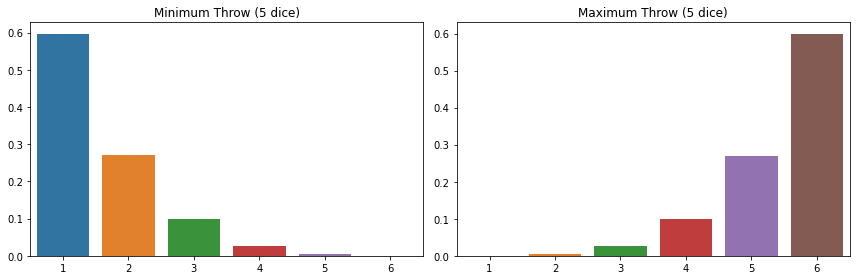

In [18]:
# Task 1: Plot min/max throws
minimal_throws = minimum_throw(5, rng)
maximal_throws = maximum_throw(5, rng)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x='face', y='probability', data=minimal_throws, ax=ax[0])
ax[0].set_title('Minimum Throw (5 dice)')
sns.barplot(x='face', y='probability', data=maximal_throws, ax=ax[1])
ax[1].set_title('Maximum Throw (5 dice)')
plt.tight_layout()
plt.show()

## ➕Sum Simulation
### Academic Concept:
### Distribution of the sum of multiple independent variables.

#### Real-World Analogs:
#### -Total revenue from a set of clients

#### -Sum of monthly purchases from multiple channels

#### -Total cost over several expense categories

#### -CLV (Customer Lifetime Value) estimation — modeled as a sum of future transactions

#### Business Value:
#### - Predict aggregate outcomes from components (clients, channels, products)

#### - Groundwork for Monte Carlo simulations in budgeting, forecasting, and revenue models

#### - Basis of Central Limit Theorem (CLT) — critical for confidence intervals and forecasting



In [19]:
def sum_throw(throws, rng, n_reps=10**5):
    results = rng.integers(1, 7, size=(n_reps, throws))
    sums = np.sum(results, axis=1)
    uniques, counts = np.unique(sums, return_counts=True)
    return {'sum': uniques, 'probability': counts / n_reps}

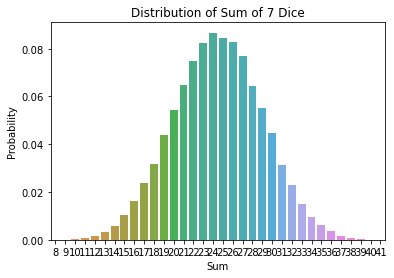

In [20]:
# Task 2: Sum distribution
simulated_throws = sum_throw(7, rng)
sns.barplot(x='sum', y='probability', data=simulated_throws)
plt.title('Distribution of Sum of 7 Dice')
plt.xlabel('Sum')
plt.ylabel('Probability')
plt.show()

### 📈 Expected Value
### Academic Concept:
#### You calculate the weighted average outcome, or expectation.

#### Real-World Analogs:
#### - Marketing ROI: What’s the expected value of a customer segment's return?

#### - Product decisions: If launching product A yields +$10k with 60% chance and -$4k with 40%, what’s the expected return?

#### - Insurance/Pricing: Pricing premiums based on expected payouts.

####  Business Value:
#### - Drives rational decision-making under uncertainty

#### -  Backbone of expected loss models, predictive analytics, risk-neutral valuation

#### - Supports cost-benefit decisions in everything from ad campaigns to fraud detection

In [21]:
def sum_expected(throws, rng, n_reps=10**5):
    simulated_throws = sum_throw(throws, rng)
    sums = simulated_throws['sum']
    probabilities = simulated_throws['probability']
    return np.sum(sums * probabilities)

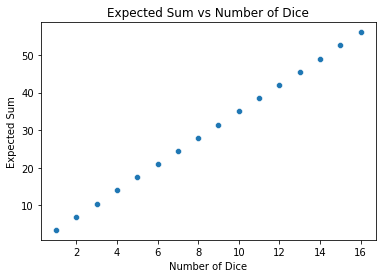

In [22]:
# Task 3: Expected value across throws
xs = range(1, 17)
ys = [sum_expected(throws, rng) for throws in xs]
sns.scatterplot(x=xs, y=ys)
plt.title('Expected Sum vs Number of Dice')
plt.xlabel('Number of Dice')
plt.ylabel('Expected Sum')
plt.show()

### ✖️ Product Simulation
#### Academic Concept:
#### You simulate the product of multiple independent variables.

#### Real-World Analogs:

#### - Compound interest models: Interest compounds via multiplication

#### - Supply chain reliability: Overall success is the product of individual success probabilities

#### - Epidemiology: Basic reproduction number (R₀) can be modeled as the product of sub-factors (transmission × contacts × duration)

#### - Manufacturing Yield: Final yield = step1_yield × step2_yield × … × stepN_yield

#### Business Value:
#### - Models multiplicative risk

#### - Helps in supply chain, manufacturing, financial modeling

#### - Can identify where a single bad link breaks the whole chain

In [23]:
def product_throw(throws, rng, n_reps=10**5):
    sims = rng.integers(1, 7, size=(n_reps, throws))
    results = np.prod(sims, axis=1)
    uniques, counts = np.unique(results, return_counts=True)
    return {'product': uniques, 'probability': counts / n_reps}

In [24]:
# Task 4: Product analysis
simulated_throws = product_throw(5, rng)
products = simulated_throws['product']
probabilities = simulated_throws['probability']
prob = sum([p for i, p in enumerate(probabilities) if products[i] > 3888])
print(f'Probability that product of 5 dice exceeds 3888: {prob:.5f}')

Probability that product of 5 dice exceeds 3888: 0.00657


In [25]:
def throw_dice(throws, func, rng, n_reps=10**5):
    simulation = rng.integers(1, 7, size=(n_reps, throws))
    result = np.apply_along_axis(func1d=func, axis=1, arr=simulation)
    uniques, counts = np.unique(result, return_counts=True)
    return {'result': uniques, 'probability': counts / n_reps}

In [27]:
output = throw_dice(5, np.max, rng)
print(output)

{'result': array([1, 2, 3, 4, 5, 6], dtype=int64), 'probability': array([1.4000e-04, 3.7900e-03, 2.7400e-02, 1.0028e-01, 2.7026e-01,
       5.9813e-01])}


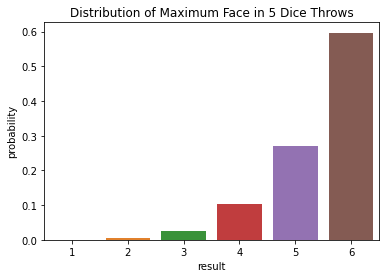

In [28]:
df = pd.DataFrame(throw_dice(5, np.max, rng))
sns.barplot(x="result", y="probability", data=df)
plt.title("Distribution of Maximum Face in 5 Dice Throws")
plt.show()